# Crimes in Boston

What we have here is a collection of crime incident report data provided by the Boston Police Department. The timeframe of this data spans from June 14, 2015 to September 3, 2018. We will use this data to answer the following questions:

1. Which districts are experiencing the most reported crimes?
2. Which categories of crime are most prevelant within each of these crime-ridden districts?
3. When are these crimes most commonly taking place?

This analysis is intended to assist the Boston Police Department in locating the most common incident occurances in an effort to redirect resources and deter future occurances. 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Thinkful/crime.csv', encoding = 'unicode_escape')

## Incident Category Frequency
We'll start by looking at the number of reported crime occurances by district. Before we proceed, let's define what a crime is. Merriam-Webster defines crime as "an illegal act for which for which someone can be punished by the government." Taking this definition into account, we must eliminate reported categories that are not explicitely illegal occurances. Such occurances that should not be categorized as crimes include Medical Assistance, Towed, Verbal Disputes, and Motor Vehicle Accident Response. These are all common occurances in the city of Boston, but they are not unlawfully damaging to society. It's also appropriate to eliminate any ambiguous categories that do not provide actionable data such as Violations, Harbor Related Incidents and Other.

In [3]:
omitted_occurances = ['Motor Vehicle Accident Response','Other','Medical Assistance','Verbal Disputes','Investigate Person',
                     'Towed','Investigate Property','Property Lost','Violations','Missing Person Located','Warrant Arrests',
                     'Property Found','License Violation','Police Service Incidents','Recovered Stolen Property',
                      'Harbor Related Incidents','Property Found','Search Warrants','Service','Warrant Arrests'
                     ]
for occurance in omitted_occurances:
    df = df[df['OFFENSE_CODE_GROUP'] != occurance]

# Incidents by District
Let us now take a look at the number of reported crime occurances by district from June 14, 2015 to September 3, 2018. Our results will help us narrow the scope of this study to a select few districts.

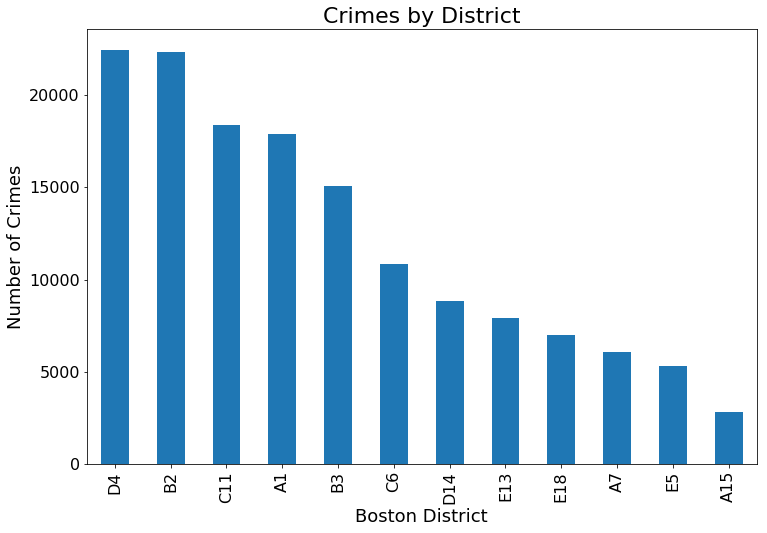

In [4]:
fig = plt.figure(3)
font = {'size':22}
font2 = {'size':18}
df.DISTRICT.value_counts().plot(kind='bar')
fig.set_size_inches(w=12,h=8)
plt.tick_params(labelsize=16)
plt.xlabel('Boston District', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by District', fontdict=font)
plt.show()

This graph clearly demonstrates a much higher rate of crime in Districts D4, B2, C11, A1 and B3 than the rest of Boston. What we'll do is dive deeper into each of these districts to analyze crime trends.

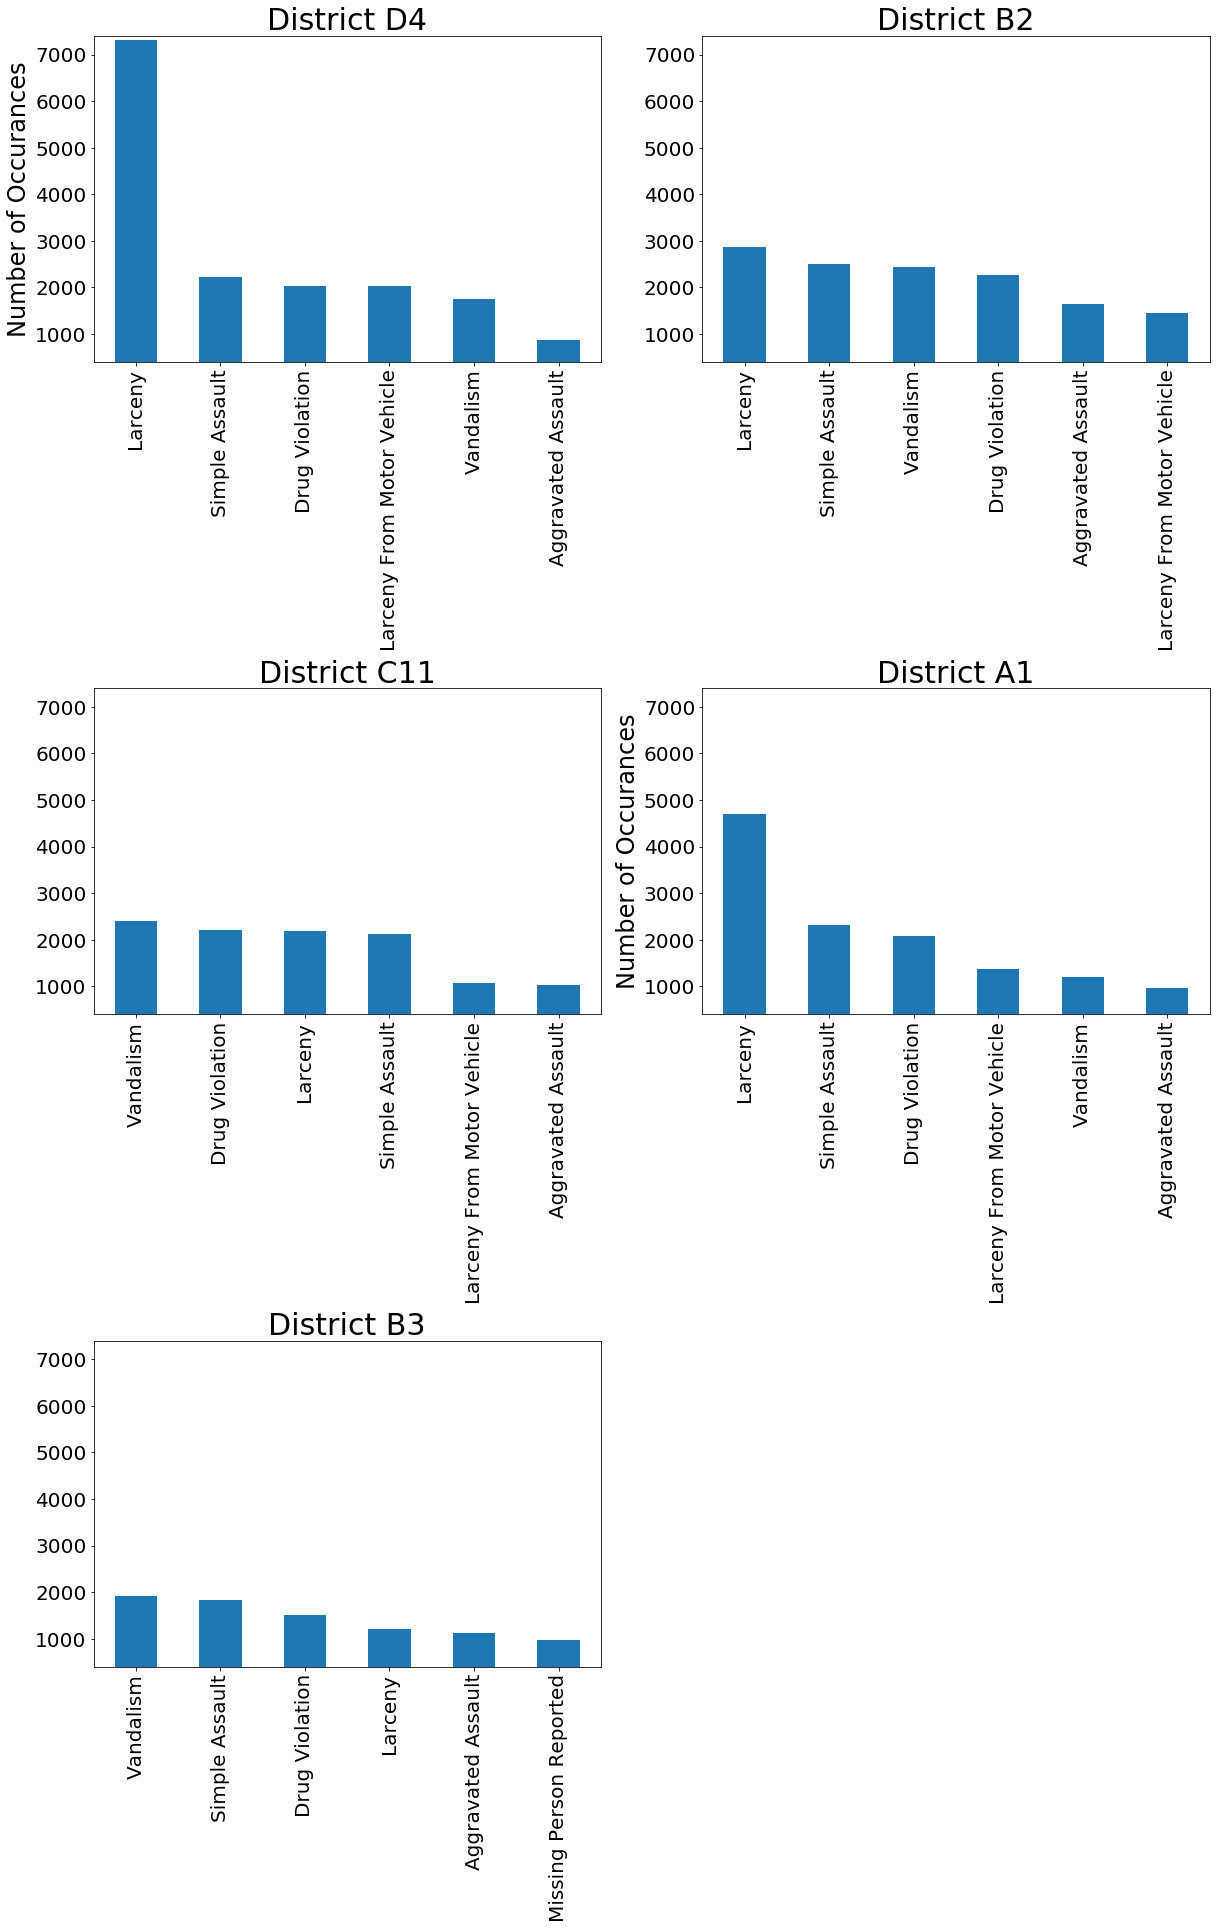

In [5]:
fig = plt.figure()
font = {'size': 24}
font2 = {'size':30}


plt.subplot(3,2,1, autoscale_on=True)
d4_df = df[df['DISTRICT'] == 'D4']
d4_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District D4', fontdict=font2)
plt.ylabel('Number of Occurances', fontdict=font)

plt.subplot(3,2,2, autoscale_on=True)
b2_df = df[df['DISTRICT'] == 'B2']
b2_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District B2', fontdict=font2)

plt.subplot(3,2,3, autoscale_on=True)
c11_df = df[df['DISTRICT'] == 'C11']
c11_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District C11', fontdict=font2)

plt.subplot(3,2,4, autoscale_on=True)
a1_df = df[df['DISTRICT'] == 'A1']
a1_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.ylabel('Number of Occurances', fontdict=font)
plt.xlabel('')
plt.title('District A1', fontdict=font2)

plt.subplot(3,2,5, autoscale_on=True)
b3_df = df[df['DISTRICT'] == 'B3']
b3_df.groupby(['OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().sort_values(ascending=False).head(6).plot(kind='bar')
plt.tick_params(labelsize=20)
plt.ylim(400,7400)
plt.xlabel('')
plt.title('District B3', fontdict=font2)


fig.set_size_inches(w=20,h=30)
fig.subplots_adjust(hspace=1)
plt.show()

What we can see from these graphs is that Districts D4, B2, C11 and A1 have the same top 6 crime categories; District B3 shares 5 out of the 6 crime categories identified by the other districts. The order and number of occurances vary between each district, but this helps us focus on specific categories of reported crimes within each of the top 5 crime-ridden districts in Boston. 

# Timing of Reported Crime Occurances
Next, let's take a look at the timing of these top 6 crime categories that were consistent across 4 out of the 5 districts with the highest crime rates in Boston. We'll start by narrowing the scope of this dataset to these 6 categories. We'll then review the month, day and hour that these crimes occur most often.

In [6]:
omitted_districts = ['A15', 'A7', 'C6', 'D14', 'E13', 'E18', 'E5'] 
for district in omitted_districts:
    df = df[df['DISTRICT'] != district]

## Crimes by Month
Now that we've trimmed this dataset down to the top 5 crime districts, we'll take a general look at the crime frequency each month using a full 2 years of data (2016 & 2017). The results will help us visualize which months realize the most crime activity.

In [7]:
df1617 = df[df.YEAR != 2015]
df1617 = df[df.YEAR != 2018]

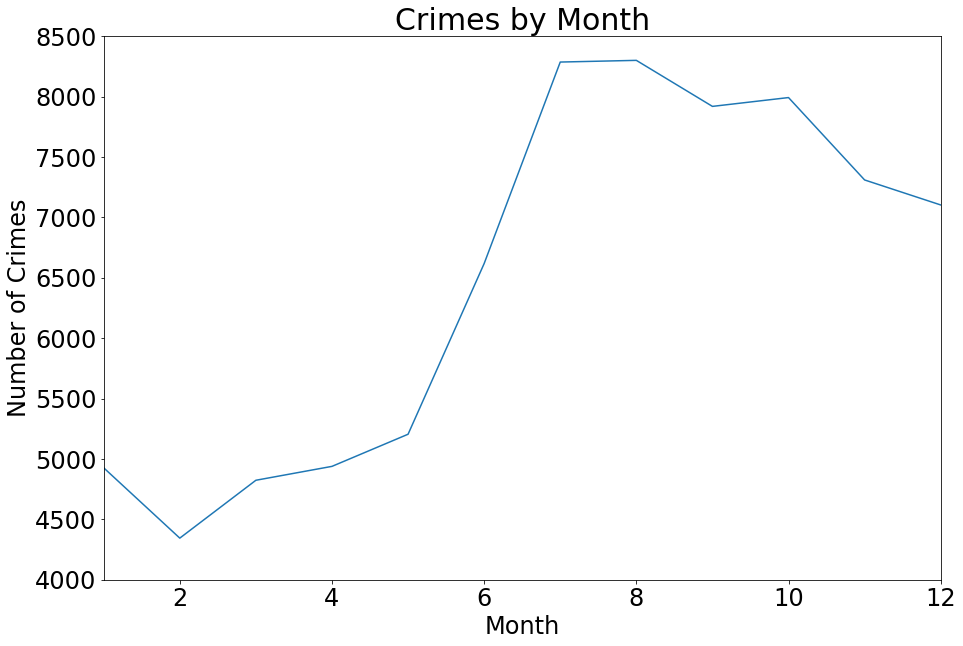

In [8]:
fig = plt.figure()
font = {'size':30}
font2 = {'size':24}
df1617.groupby(['MONTH']).MONTH.count().head(12).plot()
plt.ylim(4000,8500)
plt.tick_params(labelsize=24)
plt.xlabel('Month', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by Month', fontdict=font)
fig.set_size_inches(w=15,h=10)
plt.show()

It is clear that the summer months experience more frequent occurances of crime reports in these 5 districts than during the winter months. 

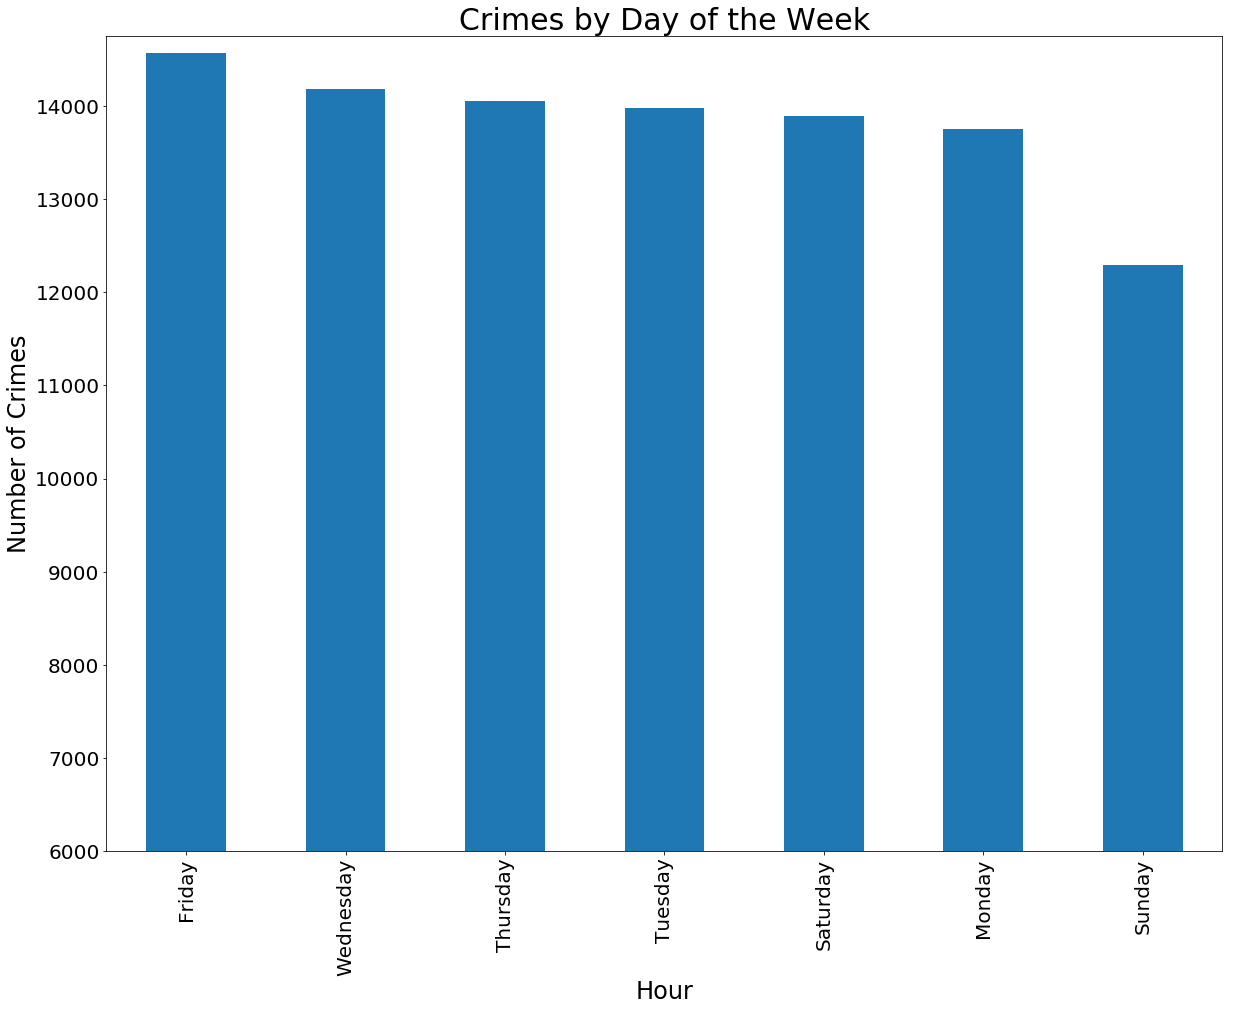

In [32]:
fig = plt.figure()
font = {'size':30}
font2 = {'size':24}
df.DAY_OF_WEEK.value_counts().plot(kind='bar')
fig.set_size_inches(w=20,h=15)
plt.ylim(6000,14750)
plt.tick_params(labelsize=20)
plt.xlabel('Hour', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by Day of the Week', fontdict=font)
plt.show()

This graph illustrates a relatively minimal fluctuation in number of crimes each day of the week. There does, however, appear to be a slight reduction in crime on Sundays. 

# Crimes by Time of Day
Finally, let's look at the frequency of crimes by time of day.

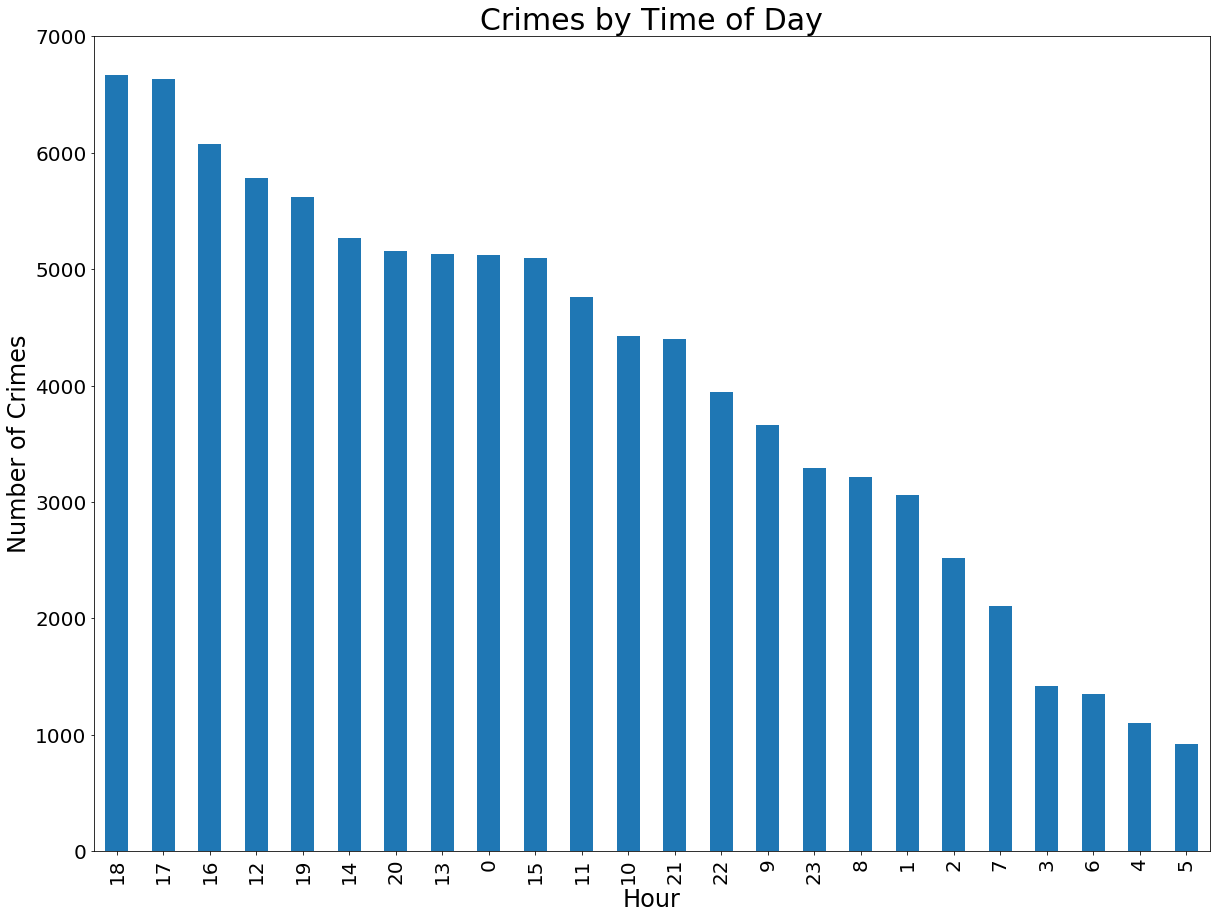

In [33]:
fig = plt.figure()
font = {'size':30}
font2 = {'size':24}
df.HOUR.value_counts().plot(kind='bar')
fig.set_size_inches(w=20,h=15)
plt.tick_params(labelsize=20)
plt.xlabel('Hour', fontdict=font2)
plt.ylabel('Number of Crimes', fontdict=font2)
plt.title('Crimes by Time of Day', fontdict=font)
plt.show()

These results show us that crimes are most commonly reported in the late afternoon hours, i.e. 4:00pm - 6:00pm. 

# Conclusion
What we've gathered from this analysis are the Boston districts with the highest rates of reported crime, the crimes that are most frequently reported within each of these districts, and the month, day and hour that crimes in these districts are most commonly taking place. The results of this analysis can be used to align Boston Police Department resources in these districts during the appropriate hours with a focus on actionable deterrence of the most commonly reported crime categories. 

Future studies should examine the number of deployed resources within each district, the population and predominant socioeconomic status within each district. Perhaps this could be analyzed using census data, capturing average household salary within each district in Boston.